In [150]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [151]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime,timedelta


In [152]:
spend_data=pd.read_csv('Dataset/spend.csv')
spend_data.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [153]:
customer_acquisition=pd.read_csv('Dataset/Customer Acqusition.csv')
customer_acquisition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [154]:
repayment_data=pd.read_csv('Dataset/repayment.csv')
repayment_data.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [155]:
creditcard_data=pd.read_excel('Dataset/Credit Card Data.xlsx')
creditcard_data.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,35.855817,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,27.356821,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,22.021249,BANGALORE,Platimum,10002,C5,Normal Salary


In [156]:
spend_data.describe()

,Sl No:,Amount
count,1500.000000,1500.000000
mean,750.500000,243096.049460
std,433.157015,141349.547367
min,1.000000,720.300000
25%,375.750000,122606.487500
50%,750.500000,239210.360000
75%,1125.250000,361617.632500
max,1500.000000,499793.490000


In [157]:
spend_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [158]:
repayment_data.drop(['Unnamed: 4','SL No:'],axis=1,inplace=True)

In [159]:
repayment_data.dropna(axis=0,inplace=True)

In [160]:
repayment_data['Month']=repayment_data['Month'].apply(lambda x:pd.to_datetime(x))

In [161]:
repayment_data.head()

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [162]:
spend_data.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [163]:
spend_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [164]:
spend_data.drop('Sl No:',axis=1,inplace=True)

In [165]:
spend_data['Month']=spend_data['Month'].apply(lambda x:pd.to_datetime(x))

In [166]:
spend_data.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [167]:
customer_acquisition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [168]:
customer_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [169]:
customer_acquisition.drop('No',axis=1,inplace=True)

In [170]:
customer_acquisition.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [171]:
customer_acquisition.loc[(customer_acquisition.Age<18),'Age']=customer_acquisition.Age.mean()

In [172]:
Customer_Spend_Transaction=pd.merge(left=customer_acquisition,right=spend_data,on='Customer')

In [173]:

Customer_Spend_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Age       1500 non-null   float64       
 2   City      1500 non-null   object        
 3   Product   1500 non-null   object        
 4   Limit     1500 non-null   float64       
 5   Company   1500 non-null   object        
 6   Segment   1500 non-null   object        
 7   Month     1500 non-null   datetime64[ns]
 8   Type      1500 non-null   object        
 9   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 128.9+ KB


In [174]:
Customer_Spend_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [175]:
Customer_Spend_Transaction['Amount']=np.where(Customer_Spend_Transaction.Amount>Customer_Spend_Transaction.Limit,Customer_Spend_Transaction.Limit/2,Customer_Spend_Transaction.A

SyntaxError: unexpected EOF while parsing (2268486287.py, line 1)

In [176]:
Customer_Spend_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [177]:
Customer_Repayment_Transaction=pd.merge(left=customer_acquisition,right=repayment_data,on='Customer')

In [178]:
Customer_Repayment_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [179]:
Customer_Repayment_Transaction['Amount']=np.where(Customer_Repayment_Transaction.Amount>Customer_Repayment_Transaction.Limit,Customer_Repayment_Transaction.Limit

SyntaxError: unexpected EOF while parsing (1641154468.py, line 1)

In [180]:
Customer_Repayment_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [181]:
Customer_Spend_Transaction['Customer'].drop_duplicates().count()

100

In [182]:
Customer_Repayment_Transaction['Customer'].drop_duplicates().count()

100

In [183]:
Customer_Spend_Transaction['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

In [184]:
Customer_Repayment_Transaction['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

In [185]:
Customer_Spend_Amount=Customer_Spend_Transaction.groupby(['Customer','Month'])[['Amount']].mean().reset_index()

In [186]:
Customer_Spend_Amount['Spend_Month']=Customer_Spend_Amount['Month'].apply(lambda x:x.month)

In [187]:
AvgMonthlySpend=Customer_Spend_Amount.groupby(['Customer','Spend_Month'])[['Amount']].mean().reset_index()

In [188]:
AvgMonthlySpend.head(20)

,Customer,Spend_Month,Amount
0,A1,1,341332.877000
1,A1,2,138421.151250
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
5,A1,10,244534.680000
6,A1,11,183839.610000
7,A10,1,173828.282500
8,A10,2,170265.770000
9,A10,3,134631.266667


In [189]:
Customer_Repayment_Amount=Customer_Repayment_Transaction.groupby(['Customer','Month'])[['Amount']].mean().reset_index()

In [190]:
Customer_Repayment_Amount['Repayment_Month']=Customer_Repayment_Amount['Month'].apply(lambda x:x.month)

In [191]:
AvgMonthlyRepayment=Customer_Repayment_Amount.groupby(['Customer','Repayment_Month'])[['Amount']].mean().reset_index()

In [192]:
AvgMonthlyRepayment.head(20)

,Customer,Repayment_Month,Amount
0,A1,1,325723.331000
1,A1,2,137713.785000
2,A1,4,254474.580000
3,A1,7,297176.740000
4,A1,9,186427.500000
5,A1,11,285729.090000
6,A10,1,283324.721667
7,A10,2,217344.503333
8,A10,3,240130.543333
9,A10,4,120467.322500


In [193]:
AvgMonthlyCustomers=pd.merge(left=AvgMonthlySpend,right=AvgMonthlyRepayment,left_on=['Customer','Spend_Month'],right_on=['Customer','Repayment_Month'])

In [194]:
AvgMonthlyCustomers['Monthly_Profit']=AvgMonthlyCustomers.Amount_y-AvgMonthlyCustomers.Amount_x

In [195]:
AvgMonthlyCustomers['Profit']=np.where(AvgMonthlyCustomers['Monthly_Profit']>0,AvgMonthlyCustomers['Monthly_Profit']*2.9/100,np.nan)

In [196]:
AvgMonthlyCustomers.head(20)

,Customer,Spend_Month,Amount_x,Repayment_Month,Amount_y,Monthly_Profit,Profit
0,A1,1,341332.877000,1,325723.331000,-15609.546000,NaN
1,A1,2,138421.151250,2,137713.785000,-707.366250,NaN
2,A1,4,261649.250000,4,254474.580000,-7174.670000,NaN
3,A1,11,183839.610000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.282500,1,283324.721667,109496.439167,3175.396736
5,A10,2,170265.770000,2,217344.503333,47078.733333,1365.283267
6,A10,3,134631.266667,3,240130.543333,105499.276667,3059.479023
7,A10,4,270721.680000,4,120467.322500,-150254.357500,NaN
8,A10,5,189207.392500,5,98672.695000,-90534.697500,NaN
9,A10,7,239798.030000,7,358194.650000,118396.620000,3433.501980


In [197]:
Customer_Spend_Transaction.groupby('Type').Amount.sum().reset_index().sort_values('Amount',ascending=False)

,Type,Amount
10,PETRO,49863174.09
4,CAMERA,41481571.96
7,FOOD,37773338.43
14,TRAIN TICKET,33067077.15
0,AIR TICKET,32955445.42
13,SHOPPING,28210354.51
6,CLOTHES,24651102.49
3,BUS TICKET,24554787.97
8,JEWELLERY,22242396.96
9,MOVIE TICKET,19644829.93


In [198]:
Customer_Spend_Transaction.groupby('City').Amount.sum().reset_index().sort_values('Amount',ascending=False)

,City,Amount
4,COCHIN,73495349.26
0,BANGALORE,69342631.62
2,CALCUTTA,64415760.01
1,BOMBAY,50828266.74
3,CHENNAI,32674988.07
7,TRIVANDRUM,25761239.41
6,PATNA,24609274.54
5,DELHI,23516564.54


In [217]:
Customer_Spend_Transaction['Age_Group']=np.where(((Customer_Spend_Transaction.Age.astype(int) >= 18) & (Customer_Spend_Transaction.Age.astype(int) < 25)), '

SyntaxError: EOL while scanning string literal (1989271642.py, line 1)

In [218]:
Customer_Spend_Transaction.groupby('Age_Group').Amount.sum()

KeyError: 'Age_Group'

In [219]:
Customer_Repayment_Transaction.groupby('Customer').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
15,A22,9372561.68
14,A21,9056336.15
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
43,A48,8292416.75
6,A14,7943268.63


In [220]:
Customer_Spend_Transaction['Yearly_Spend']=Customer_Spend_Transaction['Month'].apply(lambda x:x.year)

In [221]:
City_Wise_Data = pd.pivot_table(data = Customer_Spend_Transaction, index = 'City', columns=['Product','Yearly_Spend'], 
               values='Amount', aggfunc='sum')

In [222]:
City_Wise_Data

Product             Gold                              Platimum               \
Yearly_Spend        2004         2005         2006        2004         2005   
City                                                                          
BANGALORE     9289878.54  12892362.99  12030611.09  6046763.93   7784194.68   
BOMBAY        6987853.53   8983018.28   7917144.31  5199581.00   5134074.48   
CALCUTTA      7477140.98  10303355.80  11167532.77  5961165.93   8810284.03   
CHENNAI       1059618.50   3740945.58   2704288.62  5558572.68   8868435.43   
COCHIN        7315850.15  12110613.03  10499142.38  8472832.23  10856722.82   
DELHI         2806495.00   1964845.27   2957103.32  1565199.90   2068490.16   
PATNA         2072567.90   3252615.77   2276181.69  1113069.60   2883231.07   
TRIVANDRUM    2415102.84   1240375.85   2735710.87  3761433.87   7186762.35   

Product                        Silver                          
Yearly_Spend         2006        2004        2005        2006  
City                                                           
BANGALORE      5620904.86  6773901.65  3936068.22  4967945.66  
BOMBAY         7547549.72  3061805.08  2368375.97  3628864.37  
CALCUTTA      11305526.03  3321963.10  1285609.11  4783182.26  
CHENNAI        6921130.79  1156129.37  1000540.48  1665326.62  
COCHIN        12453968.83  4587738.70  2619231.25  4579249.87  
DELHI           764247.73  4293224.28  2515127.59  4581831.29  
PATNA          1256137.65  3398795.65  5244763.90  3111911.31  
TRIVANDRUM     4174473.45   795897.19  1445540.63  2005942.36

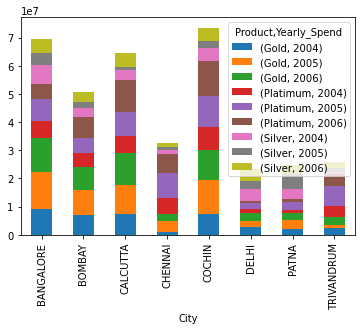

In [223]:
City_Wise_Data.plot(kind='bar',stacked=True)
plt.show()

In [224]:
Customer_Spend_Transaction['Monthly_Spend']=Customer_Spend_Transaction.Month.apply(lambda x:x.month)

<AxesSubplot:xlabel='City'>

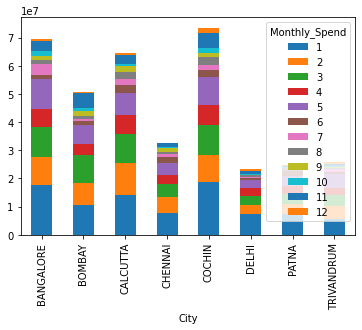

In [225]:
pd.pivot_table(data = Customer_Spend_Transaction, index = 'City', columns='Monthly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar',stacked=True)

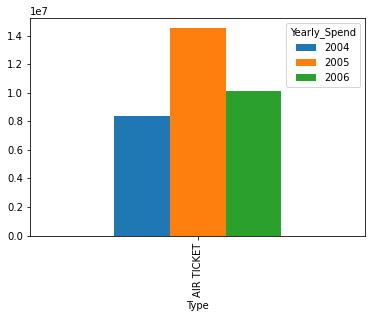

In [226]:
pd.pivot_table(data = Customer_Spend_Transaction[Customer_Spend_Transaction.Type=='AIR TICKET'], index = 'Type', columns='Yearly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Product'>

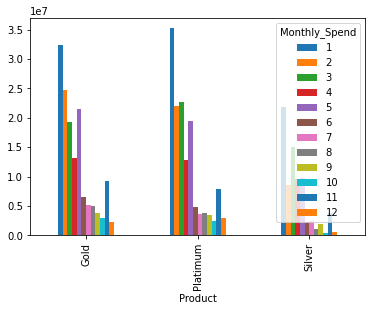

In [227]:
pd.pivot_table(data = Customer_Spend_Transaction, index = 'Product', columns='Monthly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar')

<AxesSubplot:xlabel='Product'>

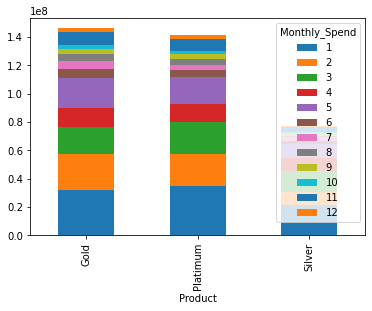

In [228]:
pd.pivot_table(data = Customer_Spend_Transaction, index = 'Product', columns='Monthly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Monthly_Spend'>

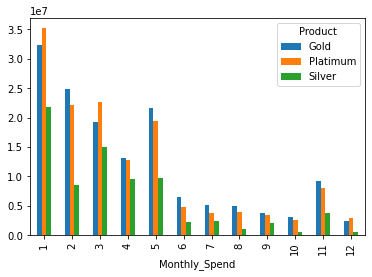

In [229]:
pd.pivot_table(data = Customer_Spend_Transaction, index = 'Monthly_Spend', columns='Product', 
               values='Amount', aggfunc='sum').plot(kind='bar')

In [230]:
Customer_Repayment_Transaction['yearly']=Customer_Repayment_Transaction.Month.apply(lambda x:x.year)
Customer_Repayment_Transaction['monthly']=Customer_Repayment_Transaction.Month.apply(lambda x:x.month)

In [231]:
def top10Customers(product_category,time_period):
    return Customer_Repayment_Transaction.loc[(Customer_Repayment_Transaction.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)"]

SyntaxError: EOL while scanning string literal (2377725728.py, line 2)

In [ ]:
product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

In [ ]:
top10Customers_Analysis=top10Customers(product_category,time_period)

In [ ]:
top10Customers_Analysis